<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>


<center><h2 style="color: #03396c;">SERIE: ANALISIS TEMPORAL DE IMPORTACIONES</h2></center>

<span style="color: #03396c;">**Autor:**</span>
- Cesar Prieto

<h2 style="color: #03396c;">INTRODUCCION</h2>

Esta serie consta del valor FOB en dólares de las importaciones que llegan a los puertos de Colombia vía marítima y su destino final es la ciudad de Bogotá, en el periodo transcurrido entre enero del 2012 hasta diciembre de 2021, la serie es de tipo **mensual**.

**Definición:** El valor FOB en dólares de la mercancía, es valor de la mercancía en el momento que se carga a bordo del medio de transporte, en este caso el marítimo.

La serie consta de 120 observaciones, lo que corresponde a los 10 años transcurridos desde el 2012 hasta el 2021

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Importaciones <span style="color: #03396c;">**MENSUALES**</span> via maritima con destino a Bogotá
- 3401 Datos tomado (Desde el 01/2012 Hasta 12/2021)
- Variable a usar: <span style="color: #03396c;">**_VAFODO_**</span>

In [1]:
# Color2  <span style="color: #03396c;"></span>

<center><h1 style="color: #011f4b;">PRIMER ANALISIS Y DESCRIPCION DE LA SERIE</h1></center>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

Paquetes necesarios para el desarrollo del problema

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series'

In [4]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir, 'Datos')
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Datos\\'

In [12]:
# Cargar el archivo CSV en un DataFrame de pandas
Importaciones = pd.read_csv(data_folder_path + "Importaciones.csv", sep=',')

In [13]:
Importaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECH            143 non-null    float64
 1   VACIP           144 non-null    int64  
 2   VAFODO          144 non-null    float64
 3   FLETE           144 non-null    float64
 4   IMP1            144 non-null    float64
 5   VACID           144 non-null    float64
 6   PBK             144 non-null    float64
 7   PNK             144 non-null    float64
 8   CANU            81 non-null     float64
 9   fecha           144 non-null    object 
 10  mes             144 non-null    object 
 11  año             144 non-null    int64  
 12  fecha_completa  144 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage: 14.8+ KB


In [14]:
#Exploracion de las variables encontradas en la base
Variables = Importaciones[['fecha_completa', 'VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].copy()

# Convertir la columna 'fecha_completa' a formato de fecha
Variables['fecha_completa'] = pd.to_datetime(Variables['fecha_completa'])

Variables.info()
Variables.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_completa  144 non-null    datetime64[ns]
 1   VACIP           144 non-null    int64         
 2   VAFODO          144 non-null    float64       
 3   FLETE           144 non-null    float64       
 4   IMP1            144 non-null    float64       
 5   VACID           144 non-null    float64       
 6   PBK             144 non-null    float64       
 7   PNK             144 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 9.1 KB


fecha_completa          VACIP        VAFODO         FLETE          IMP1  \
0     2012-01-01   869285742501  1.579419e+10  1.039715e+11  9.063473e+10   
1     2012-02-01   753291179381  1.787081e+10  5.944155e+10  8.521563e+10   
2     2012-03-01   970221001405  1.969805e+10  8.800024e+10  1.190929e+11   
3     2012-04-01   829378952699  1.597839e+10  8.199698e+10  1.523165e+11   
4     2012-05-01  1041614618811  2.355538e+10  1.157984e+11  1.217380e+11   

          VACID           PBK           PNK  
0  2.243658e+12  2.727896e+10  5.725524e+09  
1  1.327547e+12  6.703622e+09  1.794043e+10  
2  1.990896e+12  2.428291e+10  5.363545e+09  
3  1.724013e+12  1.018825e+10  5.578638e+09  
4  2.454812e+12  2.360439e+10  6.344622e+09

In [15]:
Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']] = Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].div(1000000000)
Variables.head(5)

fecha_completa        VACIP     VAFODO       FLETE        IMP1        VACID  \
0     2012-01-01   869.285743  15.794190  103.971527   90.634731  2243.657871   
1     2012-02-01   753.291179  17.870806   59.441549   85.215632  1327.547259   
2     2012-03-01   970.221001  19.698045   88.000244  119.092896  1990.895960   
3     2012-04-01   829.378953  15.978388   81.996980  152.316541  1724.013363   
4     2012-05-01  1041.614619  23.555380  115.798390  121.737966  2454.811904   

         PBK        PNK  
0  27.278956   5.725524  
1   6.703622  17.940430  
2  24.282915   5.363545  
3  10.188252   5.578638  
4  23.604388   6.344622

Hasta este punto solo hemos preparado nuestros datos, asegurandonos que las variables tuvieran el tipo correcto de dato, y para una exploracion más sencilla la conversion o el reescalado de las variables numericas que respresentan un valor de la accion, este reescalado mencionado consiste en eliminar los miles de millones "000000000", es decir 9 ceros, de los valores obtenidos.

A continuacion nos disponemos a revisar como se verian las series de estas variables.

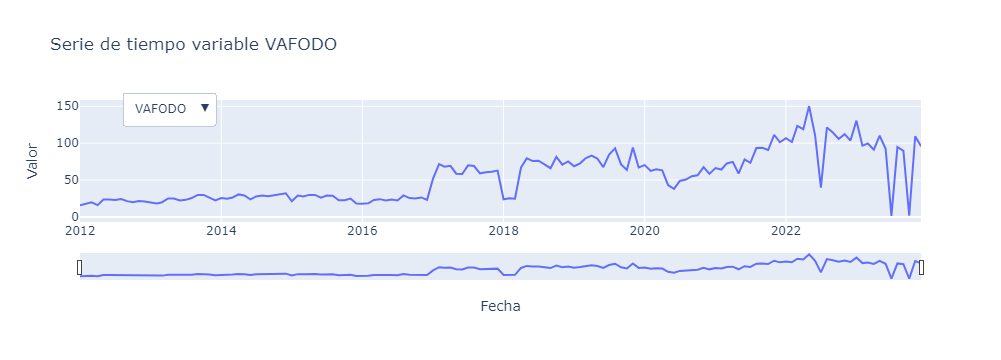

In [16]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACIP'], mode='lines', name='VACIP'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VAFODO'], mode='lines', name='VAFODO'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['FLETE'], mode='lines', name='FLETE'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['IMP1'], mode='lines', name='IMP1'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACID'], mode='lines', name='VACID'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PBK'], mode='lines', name='PBK'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PNK'], mode='lines', name='PNK'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="VACIP",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VACIP"}]),
                dict(label="VAFODO",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VAFODO"}]),
                dict(label="FLETE",
                     method="update",
                     args=[{"visible": [False, False, True, False, False, False, False]},
                           {"title": "Serie de tiempo variable FLETE"}]),
                dict(label="IMP1",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False, False]},
                           {"title": "Serie de tiempo variable IMP1"}]),
                dict(label="VACID",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False, False]},
                           {"title": "Serie de tiempo variable VACID"}]),
                dict(label="PBK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False]},
                           {"title": "Serie de tiempo variable PBK"}]),
                dict(label="PNK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True]},
                           {"title": "Serie de tiempo variable PNK"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables')

# Mostrar el gráfico
fig.show()

Del gafico anterio podemos conlcuir que todas las variables se comportan de una manera muy diferente en el tiempo explorado, por lo cual la eleccion de la variable en la que nos centraremos sera aquella que presente un comportamiento más "Estable" ene el tiempo.

<h2 style="color: #011f4b;">ELECCION DE LA VARIABLE Y DESARROLLO DE METODOLOGIAS</h2>

En la parte anterior del codigo pudimos ver como todas las variables poseen un comportamiento bastante diferente. Por esto hemos decidido que la variable elegida para desarrollar el proyecto sera la  <span style="color: #03396c;">**_VAFODO_**</span> o mejor dicho el Valor FOB dólares de la mercancía. Valor de la mercancia  en el momento que se carga a bordo del medio de transporte  marítimo.

In [17]:
# Seleccionar solo las columnas 'fecha_completa' y 'VAFODO'
Serie = Variables[['fecha_completa', 'VAFODO']]
print(Serie)

    fecha_completa      VAFODO
0       2012-01-01   15.794190
1       2012-02-01   17.870806
2       2012-03-01   19.698045
3       2012-04-01   15.978388
4       2012-05-01   23.555380
..             ...         ...
139     2023-08-01   94.747376
140     2023-09-01   89.642116
141     2023-10-01    1.523791
142     2023-11-01  109.342708
143     2023-12-01   95.723639

[144 rows x 2 columns]


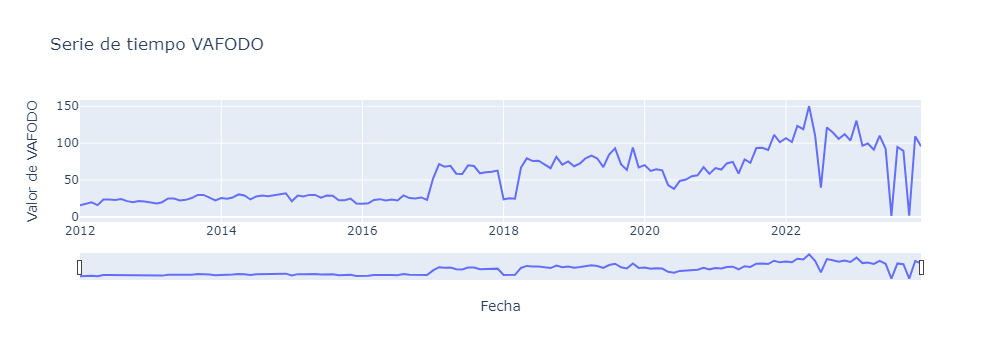

In [18]:
import plotly.graph_objects as go
import pandas as pd

# Crear la serie de tiempo con Pandas Time Series (ts)
VAFODO_series = pd.Series(Serie['VAFODO'].values, index=Serie['fecha_completa'])

# Crear la figura de Plotly
fig = go.Figure()

# Agregar la serie de tiempo al gráfico
fig.add_trace(go.Scatter(x=VAFODO_series.index, y=VAFODO_series.values, mode='lines'))

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor de VAFODO')

# Actualizar el título del gráfico
fig.update_layout(title='Serie de tiempo VAFODO')

# Mostrar el gráfico
fig.show()

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA REDUCCION DE LA VARIANZA</h3>

In [19]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [20]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(Serie['VAFODO'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Serie['VAFODO'], lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.40834707479923404
[ 5.10852085  5.49950711  5.82184441  5.14438814  6.44842952  6.4412316
  6.34582517  6.53071295  6.10329901  5.8546702   6.10864499  6.02805918
  5.71646829  5.5638126   5.85791619  6.65395667  6.63815599  6.24445826
  6.37800192  6.74050423  7.33673943  7.34544084  6.82506812  6.24993519
  6.74336775  6.62145455  6.8578093   7.43456938  7.23406832  6.46011486
  7.05232672  7.23189589  7.10665996  7.3047484   7.39371961  7.63645326
  6.06386807  7.22925318  7.06795631  7.34741043  7.34928454  6.83707819
  7.24164381  7.17772518  6.28148124  6.29379786  6.64494545  5.52038758
  5.50730646  5.60673818  6.36419625  6.52656844  6.2377567   6.43884013
  6.24841702  7.25660489  6.74444002  6.66747022  6.86879468  6.36899605
  9.84649471 11.56385693 11.27722176 11.37365638 10.45622964 10.41502527
 11.42312264 11.35079527 10.50665686 10.64446897 10.68308436 10.8247758
  6.50110839  6.68873166  6.62318603 11.18183475 12.16376963 11.87993335
 11.9

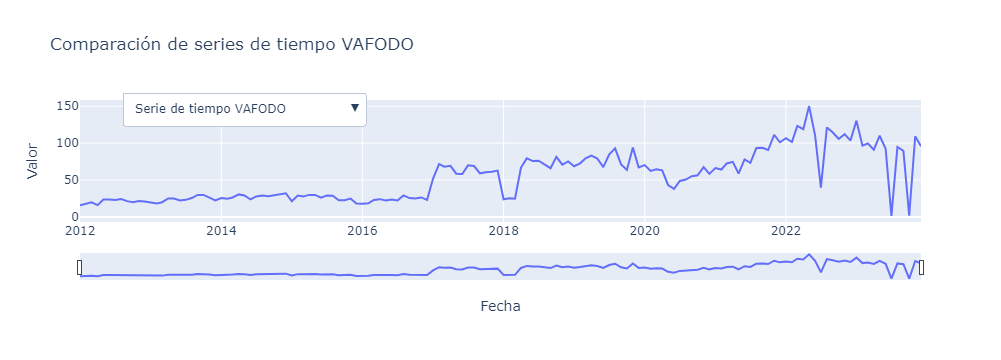

In [21]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=Serie['VAFODO'], mode='lines', name='Serie de tiempo VAFODO'))
fig.add_trace(go.Scatter(x=Serie['fecha_completa'], y=serie_boxcox, mode='lines', name='Serie de tiempo VAFODO-BoxCox', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo VAFODO",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo VAFODO"}]),
                dict(label="Serie de tiempo VAFODO-BoxCox",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo VAFODO-BoxCox"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo VAFODO')

# Mostrar el gráfico
fig.show()

A partir de este punto intentaremos mostrar los resultados para ambas series teniendo en cuenta los datos en su escala original y los datos en escala log, esto con la intencion de tener una comparacion más directa sobre lo que puede causar la tranformacion de los datos en los resultados de nuestro ejercicio.

<h3 style="color: #011f4b;">ESTIMACION Y ELIMINACION DE LA TENDENCIA</h3>

In [31]:
import statsmodels.api as sm

# Estimación de la tendencia utilizando lm (regresión lineal) para datos originales
X_original = sm.add_constant(np.arange(len(Serie['VAFODO'])))  # Añadir una columna de unos para intercepto
fit_Apertura_original = sm.OLS(serie_boxcox, X_original).fit()

# Imprimir resumen del modelo para datos originales
print(fit_Apertura_original.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     180.4
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           4.59e-27
Time:                        21:10:29   Log-Likelihood:                -313.02
No. Observations:                 144   AIC:                             630.0
Df Residuals:                     142   BIC:                             636.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3658      0.355     15.107      0.0

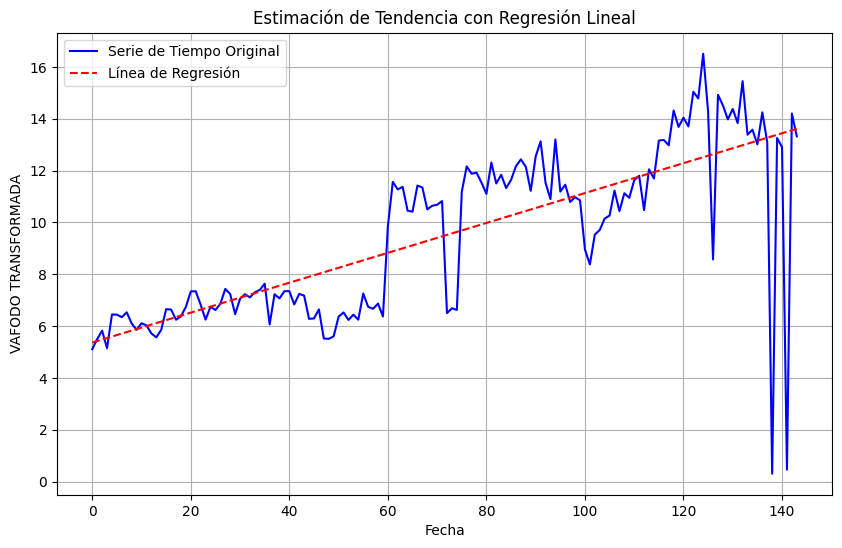

In [33]:
# Obtener la predicción de la regresión lineal
y_pred = fit_Apertura_original.predict(X_original)

# Gráfico de la serie de tiempo y la línea de regresión
plt.figure(figsize=(10, 6))
plt.plot(Serie.index, serie_boxcox, label='Serie de Tiempo Original', color='blue')
plt.plot(Serie.index, y_pred, label='Línea de Regresión', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('VAFODO TRANSFORMADA')
plt.title('Estimación de Tendencia con Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

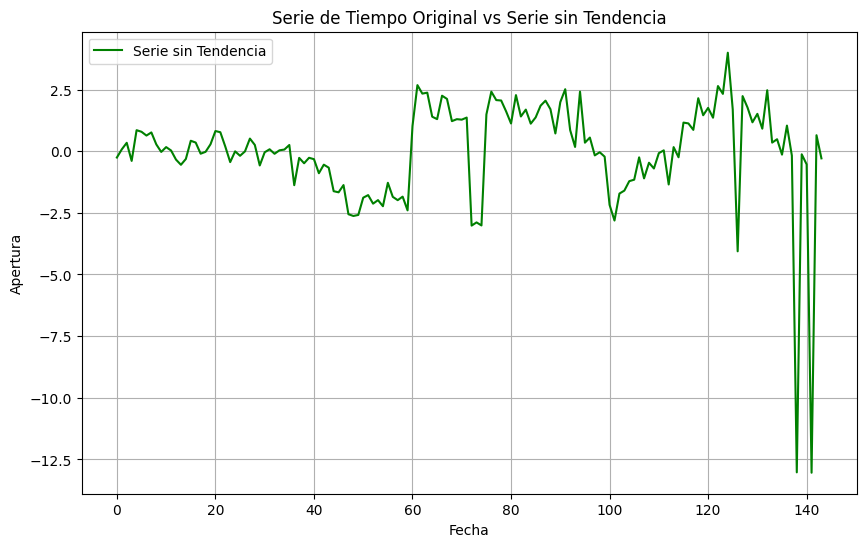

In [34]:
# Eliminar la tendencia de la serie original
VF_sin_tendencia = serie_boxcox - fit_Apertura_original.fittedvalues

# Gráfico de la serie de tiempo original y la serie sin tendencia
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, VF_sin_tendencia, label='Serie sin Tendencia', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

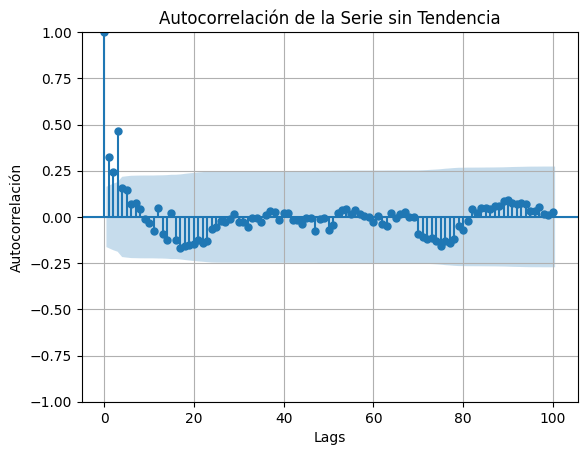

In [35]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(VF_sin_tendencia, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(VF_sin_tendencia, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

Por lo que podemos observar en el grafico de la autocorrelacion es que la estimacion de la tendencia usando el metodo de regresion lineal hace bastante bien el trabajo, sin embargo exploraremos otros metodos para verificar que estamos eligiendo el mejor de todos

<h3 style="color: #011f4b;">LOESS PARA BOXCOX</h3>

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

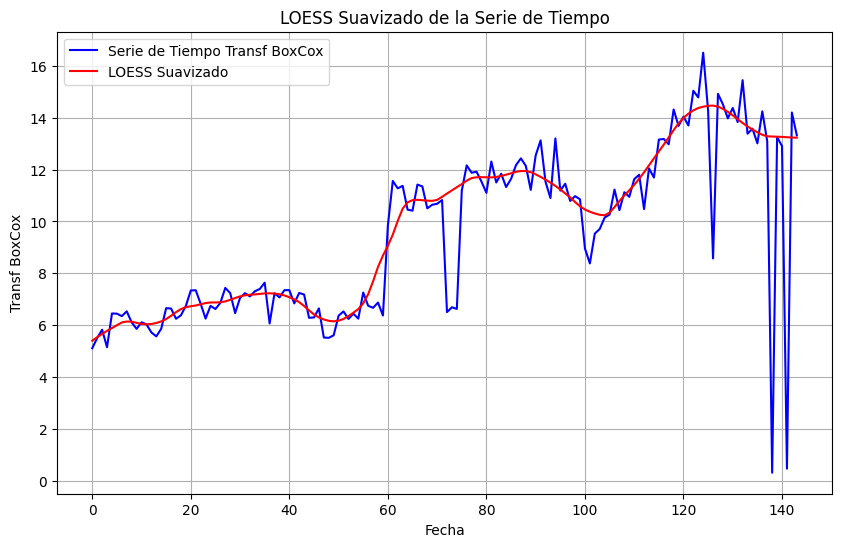

In [38]:
# Definir la ventana de suavizado (ancho de banda) para LOESS
frac = 0.1  # Porcentaje de puntos a incluir en cada ajuste local (puedes ajustar este valor)

# Aplicar LOESS a la serie de tiempo
loess_smoothed = sm.nonparametric.lowess(serie_boxcox, np.arange(len(serie_boxcox)), frac=frac)

# Extraer los valores suavizados y las coordenadas x
smoothed_values = loess_smoothed[:, 1]
indices = loess_smoothed[:, 0]

# Graficar la serie de tiempo original y la curva suavizada por LOESS
plt.figure(figsize=(10, 6))
plt.plot(Serie.index, serie_boxcox, label='Serie de Tiempo Transf BoxCox', color='blue')
plt.plot(Serie.index, smoothed_values, label='LOESS Suavizado', color='red')
plt.xlabel('Fecha')
plt.ylabel('Transf BoxCox')
plt.title('LOESS Suavizado de la Serie de Tiempo')
plt.legend()
plt.grid(True)
plt.show()

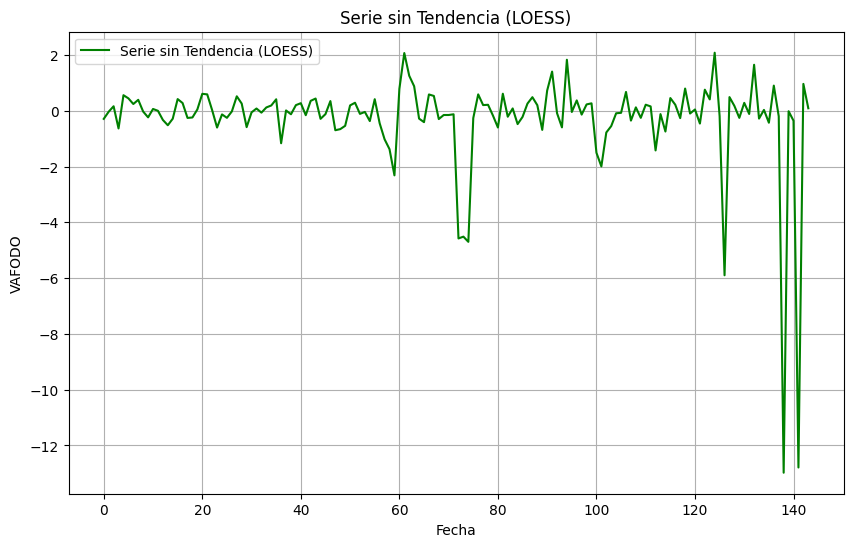

In [39]:
# Eliminar la tendencia obtenida por LOESS
BoxCox_sin_ten_loess = serie_boxcox - smoothed_values

# Graficar la serie de tiempo original y la serie sin tendencia por LOESS
plt.figure(figsize=(10, 6))
plt.plot(Serie.index, BoxCox_sin_ten_loess, label='Serie sin Tendencia (LOESS)', color='green')
plt.xlabel('Fecha')
plt.ylabel('VAFODO')
plt.title('Serie sin Tendencia (LOESS)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

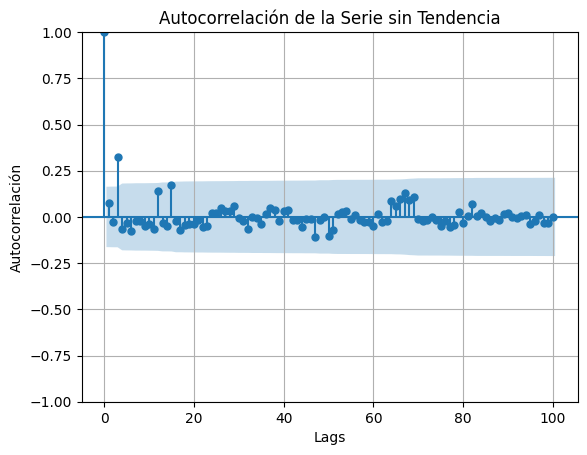

In [41]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(BoxCox_sin_ten_loess, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 8))
tsaplots.plot_acf(BoxCox_sin_ten_loess, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

Ahora vemos como el modelo LOESS para la estimación de la tendencia basandonos en el grafico de autocorrelacion lo hace un poco mejor que el modelo lineal, de modo que este nos da una mayor estabilidad en las correlaciones de la serie

<h3 style="color: #011f4b;">DESCOMPOSICION STL</h3>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

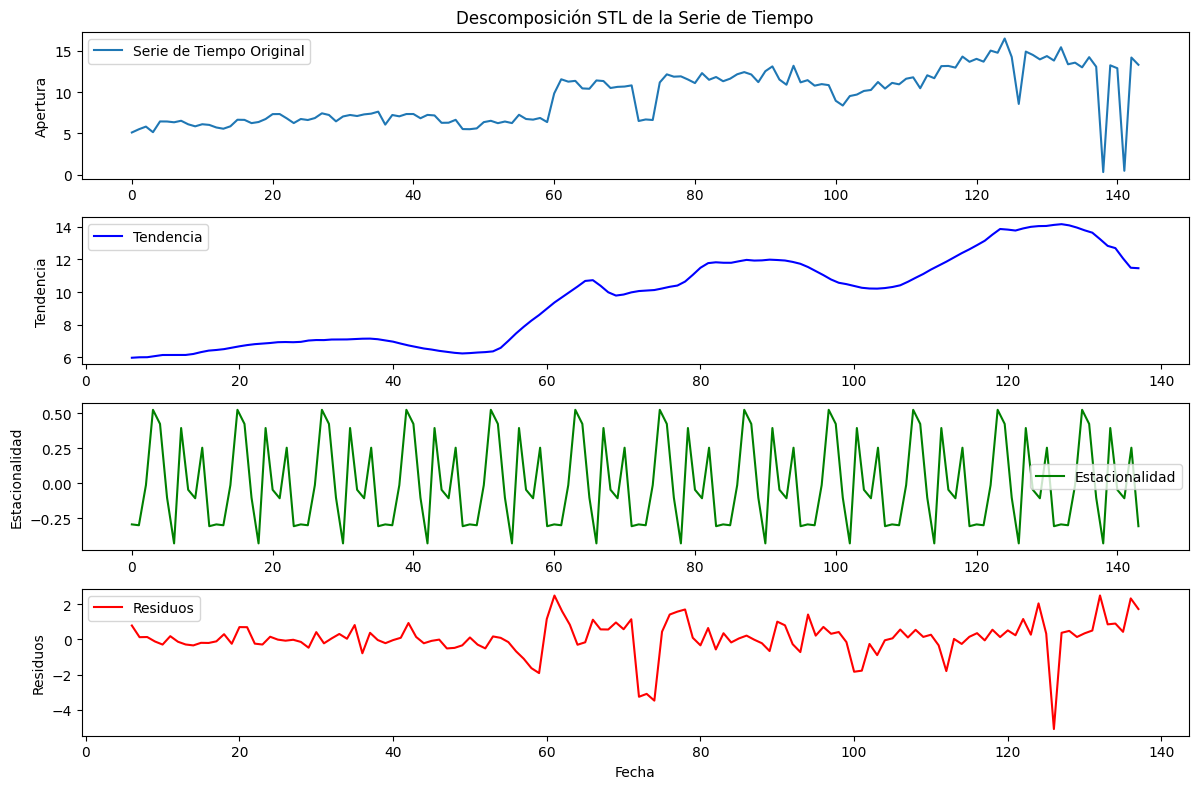

In [44]:
# Aplicar descomposición STL a la serie de tiempo
stl_result = sm.tsa.seasonal_decompose(serie_boxcox, period=12, model="additive")

# Graficar las componentes de la descomposición STL
plt.figure(figsize=(12, 8))

# Serie de tiempo original
plt.subplot(411)
plt.plot(Serie.index, serie_boxcox, label='Serie de Tiempo Original')
plt.legend()
plt.title('Descomposición STL de la Serie de Tiempo')
plt.ylabel('Apertura')

# Componente de tendencia
plt.subplot(412)
plt.plot(Serie.index, stl_result.trend, label='Tendencia', color='blue')
plt.legend()
plt.ylabel('Tendencia')

# Componente estacional
plt.subplot(413)
plt.plot(Serie.index, stl_result.seasonal, label='Estacionalidad', color='green')
plt.legend()
plt.ylabel('Estacionalidad')

# Residuos
plt.subplot(414)
plt.plot(Serie.index, stl_result.resid, label='Residuos', color='red')
plt.legend()
plt.ylabel('Residuos')

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

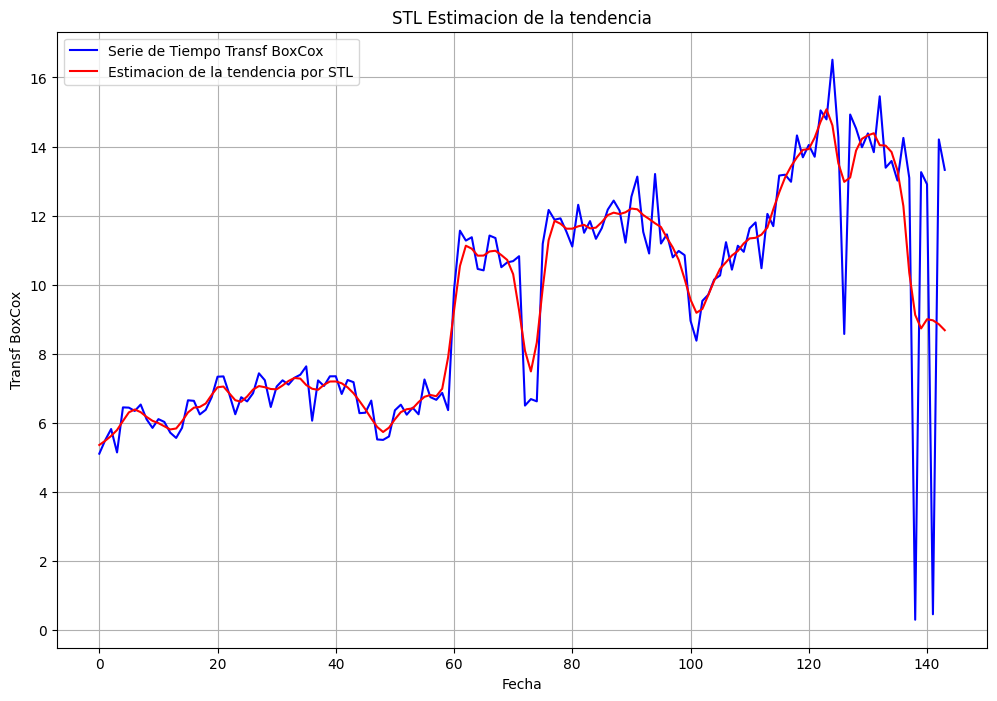

In [54]:
# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': Serie.index, 'BoxCox': serie_boxcox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# DESCOMPOSICION STL
stl = STL(df_BoxCox['BoxCox'], period = 3 )
result = stl.fit()

# Estimación de la tendencia por STL
tendencia_stl = result.trend

# Graficar la serie de tiempo original y la curva suavizada por LOESS
plt.figure(figsize=(12, 8))
plt.plot(Serie.index, serie_boxcox, label='Serie de Tiempo Transf BoxCox', color='blue')
plt.plot(Serie.index, tendencia_stl, label='Estimacion de la tendencia por STL', color='red')
plt.xlabel('Fecha')
plt.ylabel('Transf BoxCox')
plt.title('STL Estimacion de la tendencia')
plt.legend()
plt.grid(True)
plt.show()

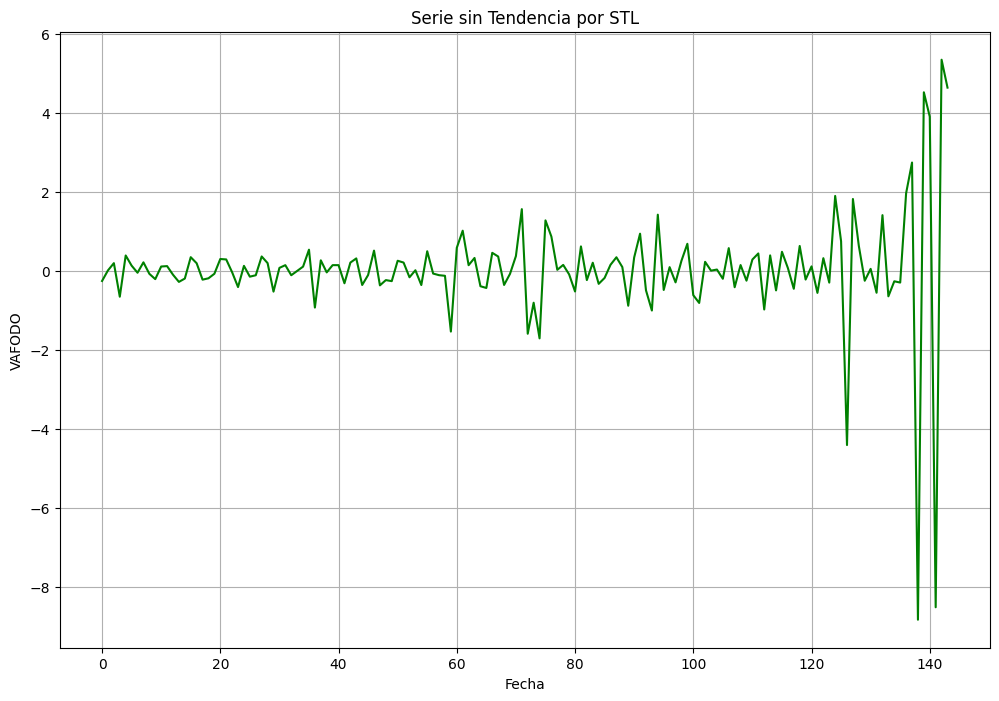

In [55]:
# Serie sin tendencia por STL
sin_tendencia_stl = df_BoxCox['BoxCox'] - tendencia_stl

# Graficar la serie sin tendencia por STL
plt.figure(figsize=(12, 8))
plt.plot(sin_tendencia_stl,color='green')
plt.title('Serie sin Tendencia por STL')
plt.xlabel('Fecha')
plt.ylabel('VAFODO')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

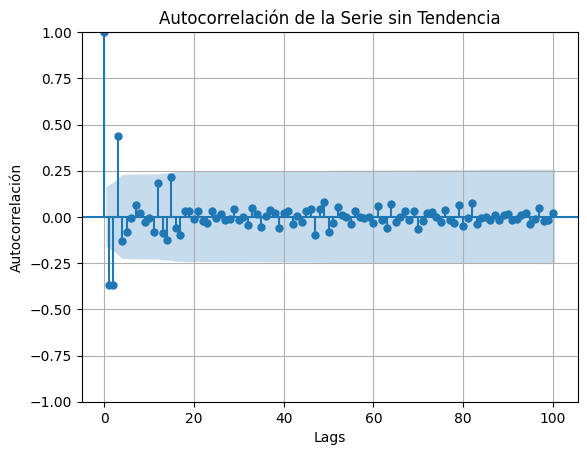

In [57]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(sin_tendencia_stl, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(12, 8))
tsaplots.plot_acf(sin_tendencia_stl, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

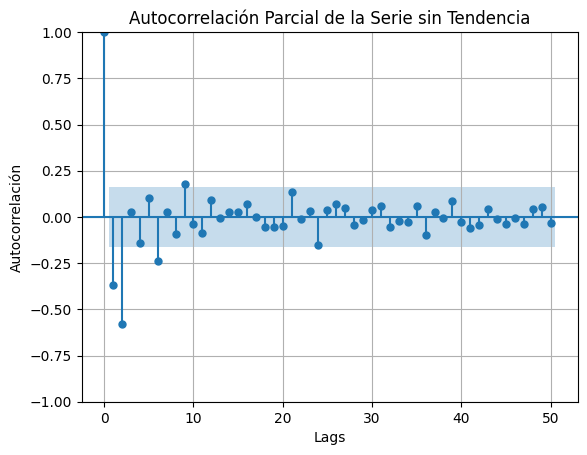

In [58]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(sin_tendencia_stl, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(12, 8))
tsaplots.plot_pacf(sin_tendencia_stl, lags=50, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación Parcial de la Serie sin Tendencia')
plt.grid(True)
plt.show()

<h3 style="color: #011f4b;">ESTIMACION DE LA TENDENCIA USANDO SPLINES</h3>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

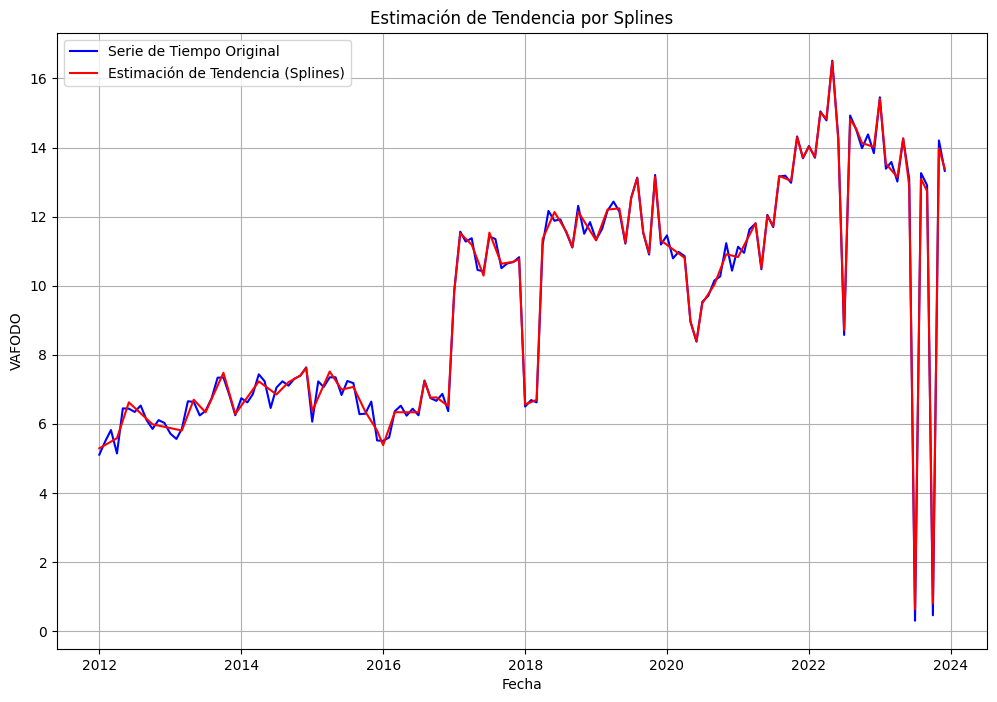

In [64]:
# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': Serie['fecha_completa'], 'BoxCox': serie_boxcox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# Ajuste de splines para estimar la tendencia
dates = df_BoxCox.index.to_julian_date()  # Convertir las fechas a días julianos para facilitar el ajuste spline
values = df_BoxCox['BoxCox'].values

# Ajustar un spline cúbico suave
spline = UnivariateSpline(dates, values, k=1, s = 5)  # k=3 para un spline cúbico
trend_spline = spline(dates)  # Valores estimados de la tendencia

# Graficar la serie de tiempo original y la tendencia estimada por splines
plt.figure(figsize=(12, 8))
plt.plot(df_BoxCox.index, df_BoxCox['BoxCox'], label='Serie de Tiempo Original', color='blue')
plt.plot(df_BoxCox.index, trend_spline, label='Estimación de Tendencia (Splines)', color='red')
plt.xlabel('Fecha')
plt.ylabel('VAFODO')
plt.title('Estimación de Tendencia por Splines')
plt.legend()
plt.grid(True)
plt.show()

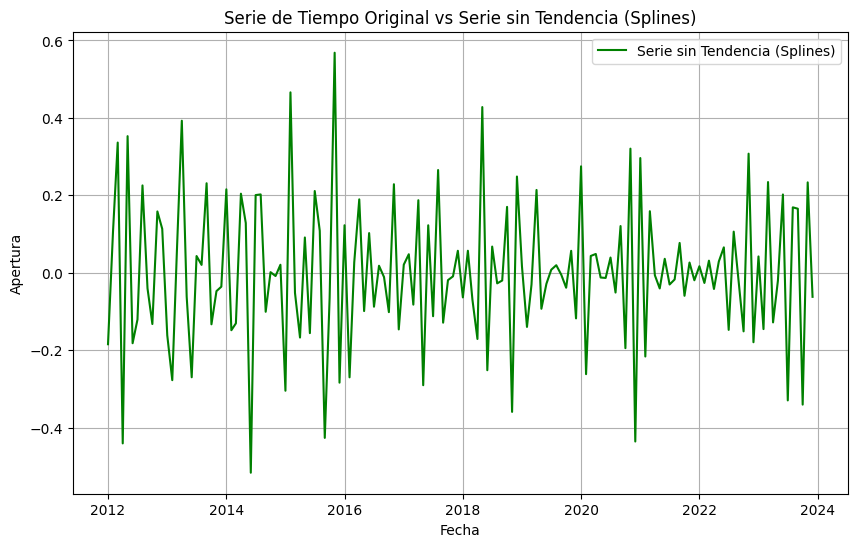

In [65]:
# Serie sin tendencia (remover la tendencia estimada por splines)
sin_tendencia_spline = df_BoxCox['BoxCox'] - trend_spline

# Graficar la serie de tiempo original y la serie sin tendencia por splines
plt.figure(figsize=(10, 6))
plt.plot(df_BoxCox.index, sin_tendencia_spline, label='Serie sin Tendencia (Splines)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia (Splines)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

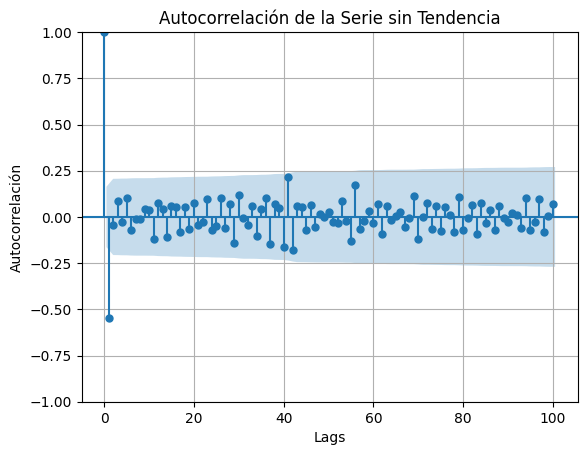

In [66]:
# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(sin_tendencia_spline, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(sin_tendencia_spline, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

En la eliminación de la tendencia usando Splines también logramos observar una buena estimación de la tendencia, lo cual se ve reflejado luego de la eliminación de esta de la serie en el gráfico de Autocorrelación, en el cual podemos observar como la correlación entre rezagos disminuye notoria y rápidamente a 0 luego de un par de ellos.

<h3 style="color: #011f4b;">DIFERENCIA ORDINARA</h3>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [68]:
# AR Model para determinar autocorrelación
model_ar = AutoReg(serie_boxcox, lags=1)
results_ar = model_ar.fit()

# Coeficientes del modelo AR
print("Coeficiente del primer rezago (AR(1)):", results_ar.params[1])

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie original
adf_result_orig = adfuller(serie_boxcox, maxlag=12, regression="c", autolag="AIC")
print("Resultado de la prueba de Dickey-Fuller para serie original:")
print("Estadístico ADF:", adf_result_orig[0])
print("Valor crítico al 1%:", adf_result_orig[4]['1%'])
print("Valor crítico al 5%:", adf_result_orig[4]['5%'])
print("Valor crítico al 10%:", adf_result_orig[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_orig[1] < 0.05)

Coeficiente del primer rezago (AR(1)): 0.6982480533832158
Resultado de la prueba de Dickey-Fuller para serie original:
Estadístico ADF: -1.641746018630378
Valor crítico al 1%: -3.481281802271349
Valor crítico al 5%: -2.883867891664528
Valor crítico al 10%: -2.5786771965503177
Es estacionaria (p-valor): False


La serie de tiempo muestra una fuerte persistencia, con un coeficiente AR(1) de aproximadamente 0.70. La prueba de Dickey-Fuller indica que la serie no es estacionaria, ya que el estadístico ADF (-1.64) es mayor que los valores críticos en todos los niveles de significancia usuales. Esto sugiere la presencia de una raíz unitaria, implicando que la serie necesita ser diferenciada para alcanzar la estacionariedad antes de proceder con análisis adicionales.

In [69]:
# Serie Diferenciada
Diff_BoxCox = np.diff(serie_boxcox, n=1)

# AR Model para la serie diferenciada
model_ar_diff = AutoReg(Diff_BoxCox, lags=1)
results_ar_diff = model_ar_diff.fit()

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie diferenciada
adf_result_diff = adfuller(Diff_BoxCox, maxlag=12, regression="c", autolag="AIC")
print("\nResultado de la prueba de Dickey-Fuller para serie diferenciada:")
print("Estadístico ADF:", adf_result_diff[0])
print("Valor crítico al 1%:", adf_result_diff[4]['1%'])
print("Valor crítico al 5%:", adf_result_diff[4]['5%'])
print("Valor crítico al 10%:", adf_result_diff[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_diff[1] < 0.05)


Resultado de la prueba de Dickey-Fuller para serie diferenciada:
Estadístico ADF: -3.3972277782274576
Valor crítico al 1%: -3.481281802271349
Valor crítico al 5%: -2.883867891664528
Valor crítico al 10%: -2.5786771965503177
Es estacionaria (p-valor): True


Tras aplicar la diferenciación, la serie de tiempo ahora muestra características de estacionariedad. El estadístico ADF (-3.40) es menor que los valores críticos al 5% y 10%, rechazando la hipótesis nula de no estacionariedad con un nivel de confianza del 95%. Esto indica que la serie diferenciada es estacionaria, lo que la hace adecuada para análisis posteriores y modelado de series temporales.

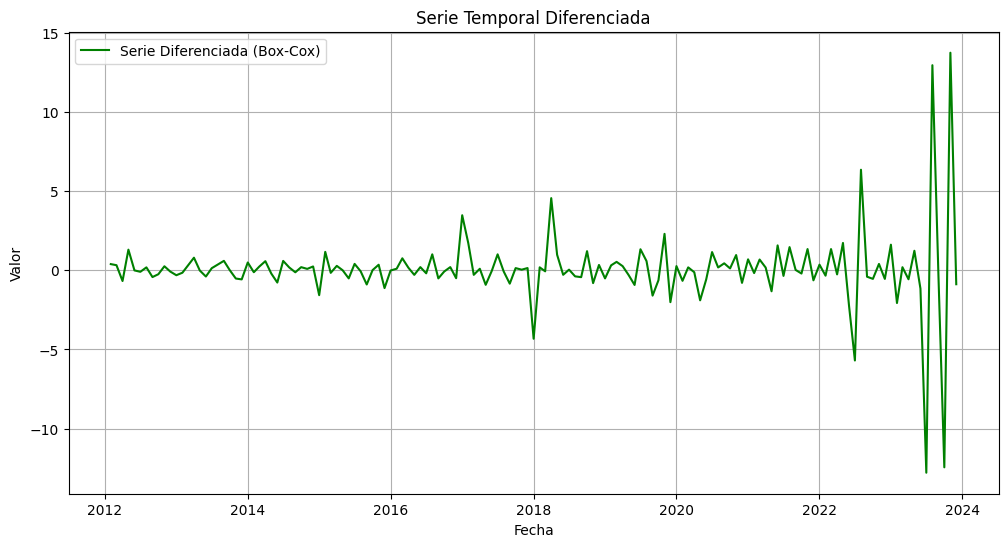

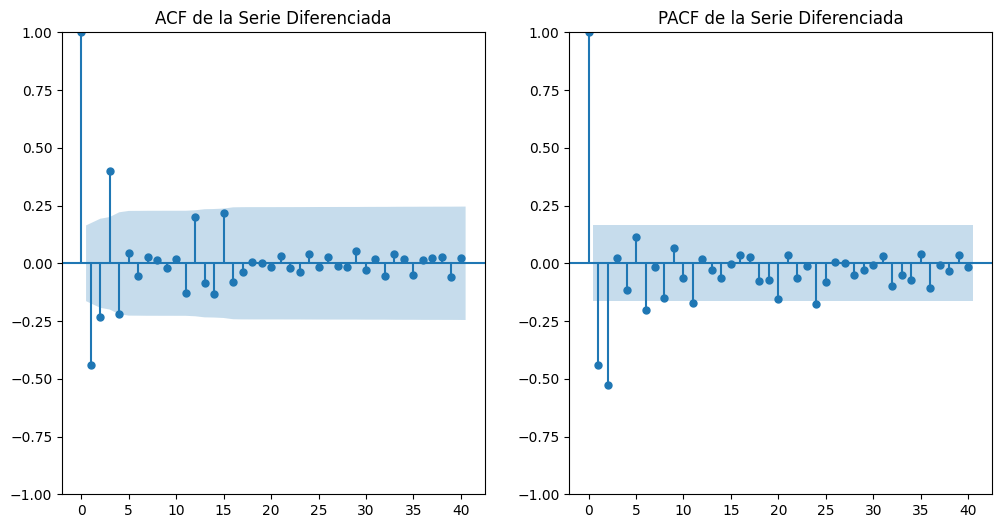

In [70]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear DataFrame para la serie diferenciada con la misma longitud que la serie original
diff_df = pd.DataFrame({'Fecha': Serie['fecha_completa'][1:], 'Diff_BoxCox': Diff_BoxCox})

# Graficar la serie diferenciada
plt.figure(figsize=(12, 6))
plt.plot(diff_df['Fecha'], diff_df['Diff_BoxCox'], label='Serie Diferenciada (Box-Cox)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal Diferenciada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(Diff_BoxCox, lags=40, ax=plt.gca())
plt.title('ACF de la Serie Diferenciada')

plt.subplot(122)
plot_pacf(Diff_BoxCox, lags=40, method='ywm', ax=plt.gca())
plt.title('PACF de la Serie Diferenciada')

plt.show()

In [71]:
# AR Model para determinar autocorrelación
model_ar = AutoReg(sin_tendencia_spline, lags=1)
results_ar = model_ar.fit()

# Coeficientes del modelo AR
print("Coeficiente del primer rezago (AR(1)):", results_ar.params[1])

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie original
adf_result_orig = adfuller(sin_tendencia_spline, maxlag=12, regression="c", autolag="AIC")
print("Resultado de la prueba de Dickey-Fuller para serie original:")
print("Estadístico ADF:", adf_result_orig[0])
print("Valor crítico al 1%:", adf_result_orig[4]['1%'])
print("Valor crítico al 5%:", adf_result_orig[4]['5%'])
print("Valor crítico al 10%:", adf_result_orig[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_orig[1] < 0.05)

Coeficiente del primer rezago (AR(1)): -0.5462716360242996
Resultado de la prueba de Dickey-Fuller para serie original:
Estadístico ADF: -6.658832108297242
Valor crítico al 1%: -3.4808880719210005
Valor crítico al 5%: -2.8836966192225284
Valor crítico al 10%: -2.5785857598714417
Es estacionaria (p-valor): True


La eliminación de la tendencia mediante splines ha transformado significativamente las propiedades de la serie. El coeficiente AR(1) negativo (-0.55) sugiere una reversión a la media. La prueba de Dickey-Fuller muestra un estadístico ADF (-6.66) muy por debajo de todos los valores críticos, indicando fuertemente que la serie es estacionaria. Esto confirma que la remoción de la tendencia ha logrado estacionarizar la serie, haciéndola apropiada para análisis estadísticos posteriores sin necesidad de diferenciación adicional.

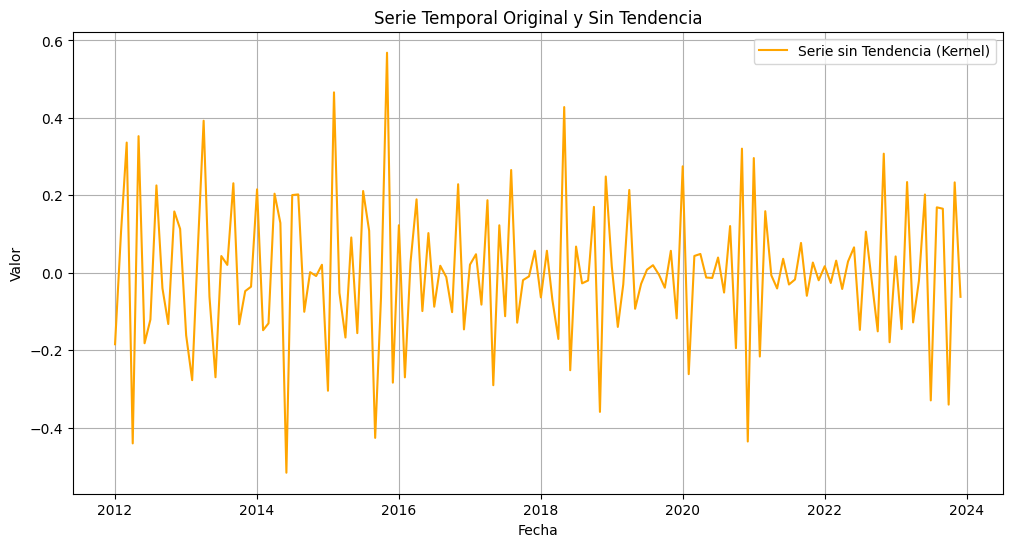

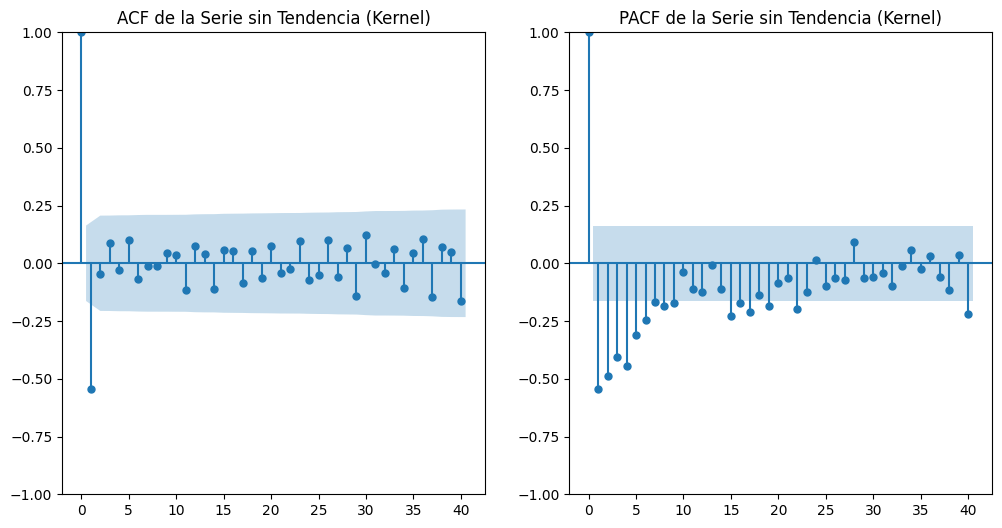

In [74]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualizar la serie original y la serie sin tendencia
plt.figure(figsize=(12, 6))
#plt.plot(ARGOS['Fecha'], BoxCox, label='Serie Original (Box-Cox)')
plt.plot(Serie['fecha_completa'], sin_tendencia_spline, label='Serie sin Tendencia (Kernel)', linestyle='-', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.title('Serie Temporal Original y Sin Tendencia')
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie sin tendencia
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(sin_tendencia_spline, lags=40, ax=plt.gca())
plt.title('ACF de la Serie sin Tendencia (Kernel)')

plt.subplot(122)
plot_pacf(sin_tendencia_spline, lags=40, method='ywm', ax=plt.gca())
plt.title('PACF de la Serie sin Tendencia (Kernel)')

plt.show()

<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

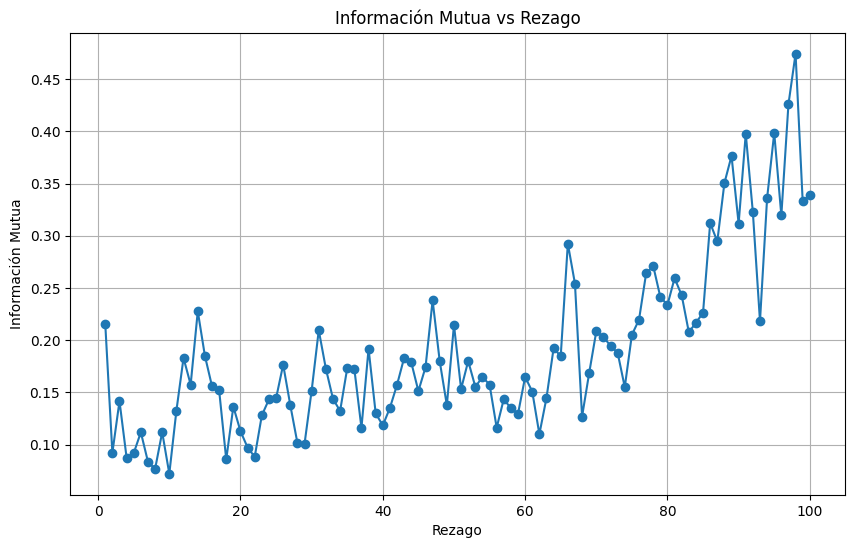

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [mutual_information(Diff_BoxCox[:-lag], Diff_BoxCox[lag:]) for lag in lag_values]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(10, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

In [79]:
# Selección de rezagos con alta MI para modelado
high_mi_lags = [lag for lag, mi in zip(lag_values, mutual_info_values) if mi > np.mean(mutual_info_values)]
print(high_mi_lags)

[1, 14, 31, 38, 47, 50, 64, 66, 67, 70, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


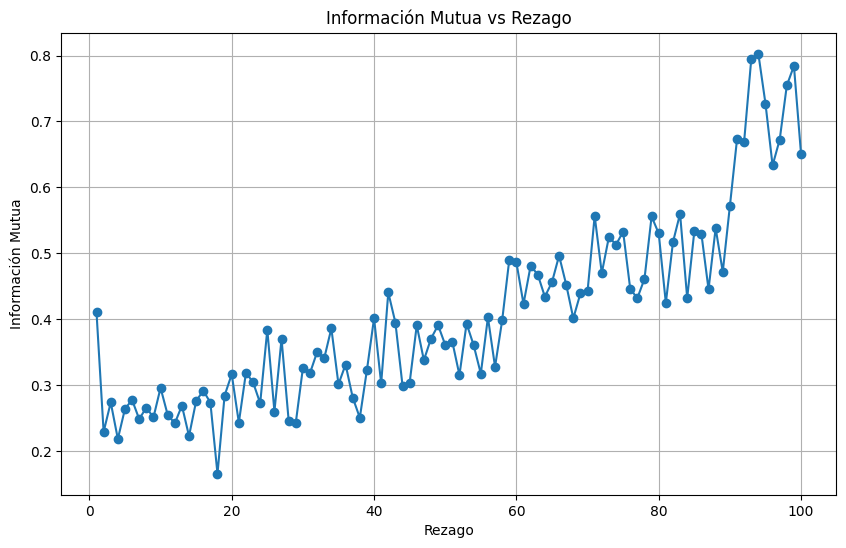

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [mutual_information(sin_tendencia_spline[:-lag], sin_tendencia_spline[lag:]) for lag in lag_values]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(10, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

In [81]:
# Selección de rezagos con alta MI para modelado
high_mi_lags = [lag for lag, mi in zip(lag_values, mutual_info_values) if mi > np.mean(mutual_info_values)]
print(high_mi_lags)

[1, 42, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


El indice de informacion mutua en cada caso es un poco confuso, no se haya un patron de tiempo claro al cual apegarse por lo que se espera tomar los primeros 3 rezagos y a partir de estos cada 6, esperamos que la deteccion de la estacionalidad nos de una mejor idea de cuales son los rezagos más dicientes

<h3 style="color: #011f4b;">DETECCION DE ESTACIONALIDAD</h3>

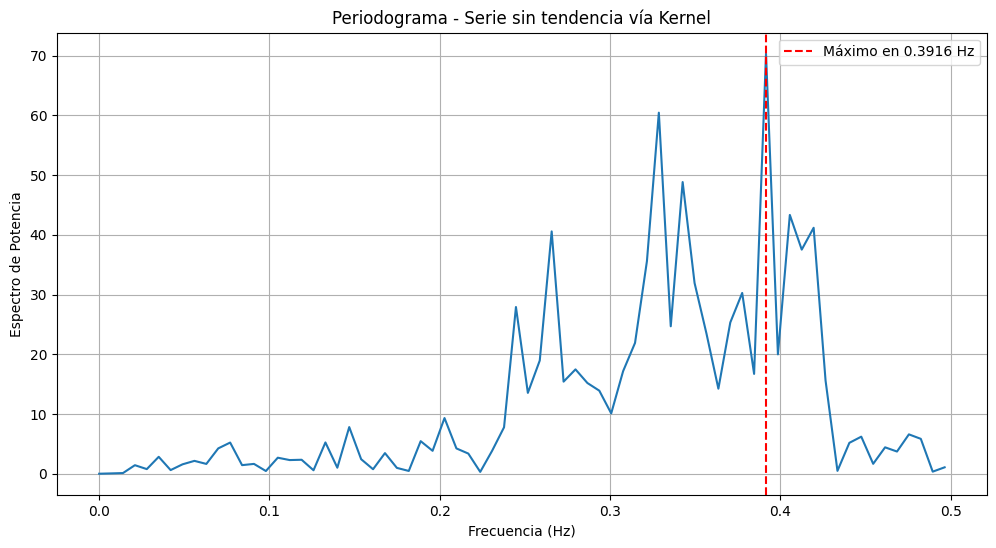

Frecuencia dominante: 0.39
Periodo dominante: 2.55 unidades de tiempo


In [83]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(Diff_BoxCox)

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.title('Periodograma - Serie sin tendencia vía Kernel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Frecuencia dominante: {max_frequency:.2f}')
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

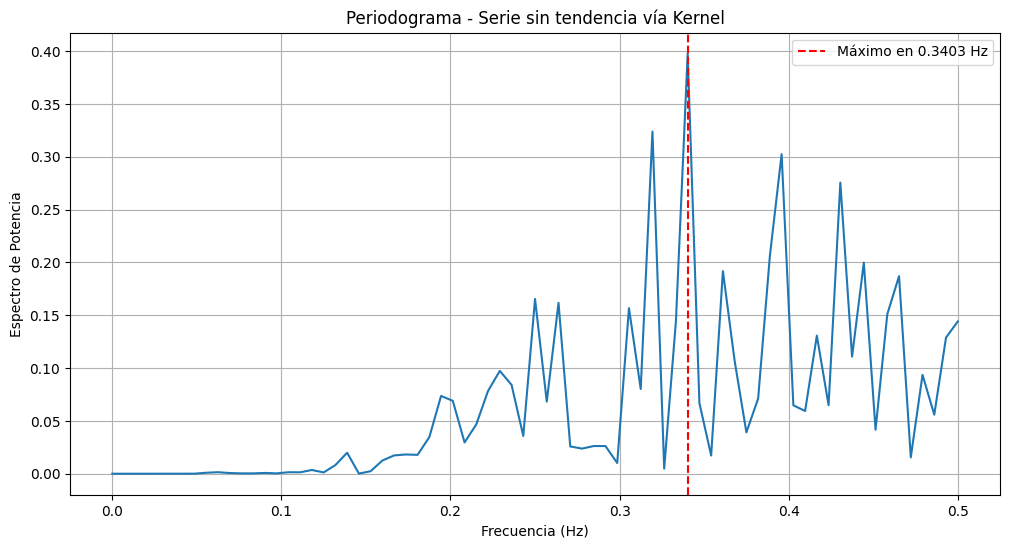

Frecuencia dominante: 0.34
Periodo dominante: 2.94 unidades de tiempo


In [82]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(sin_tendencia_spline)

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.title('Periodograma - Serie sin tendencia vía Kernel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Frecuencia dominante: {max_frequency:.2f}')
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

Los resultados para 2.5 unidades de tiempo y 2.94 unidades de tiempo nos da un poco la idea que ya teniamos anteriormente, es decir, tomar rezagos multiplos de 3 o 6 para un analisis más profundo sería lo indicado en este caso. 